#  NBA Scoring Strategy Evolution (2004–2024)

##  Summary
The modern NBA looks vastly different from the early 2000s. Once dominated by inside-out play and mid-range jumpers, the league has shifted toward spacing and perimeter efficiency.  

Analysis of shot data from the 2003–04 and 2023–24 seasons reveals a sharp decline in mid-range and long two-point attempts, replaced by an emphasis on shots at the rim and from beyond the arc.  

To succeed in today’s game, players across all positions must be capable of stretching the floor with three-point range and creating space for high-efficiency looks near the basket.

###  Player Development Implications
| Position | Strategic Focus |
|-----------|-----------------|
| **Guards** | Develop consistent three-point shooting, penetrate off the dribble, and create opportunities via kick-out passes. |
| **Forwards** | Combine outside shooting with slashing and finishing through contact or traffic. |
| **Centers** | Maintain post-play dominance while adding perimeter range to improve team spacing and open driving lanes. |

---

##  Goal
Evaluate how NBA shot selection has evolved between 2004 and 2024, highlighting how offensive strategies have adapted to analytics-driven efficiency.

---

##  Background
Basketball scoring revolves around the tradeoff between shot consistency and point value.  

Historically, teams favored mid-range and post play for their reliability. As analytics matured, the **expected value (EV)** of shots became central to strategy—revealing that three-point attempts, despite lower accuracy, yield higher returns over time.  

This insight sparked the **“Pace-and-Space Revolution”**, transforming offensive schemes to prioritize rim and perimeter shots while minimizing mid-range attempts.

---

##  Methodology
This analysis uses NBA shot-level spatial data covering all regular-season attempts from **2003–04 to 2023–24** (≈4 million shots).  

Each record includes:
- Player and team identifiers  
- Position group  
- Opponent  
- 2D shot coordinates (`LOC_X`, `LOC_Y`)  
- Contextual shot data (distance, result, shot type)

The study focuses on **shot distance distributions** across seasons and positions to quantify how offensive geometry and player roles have evolved over time.

---

##  Key Findings

### 1. Decline of the Mid-Range
- Shot density in mid-range areas (just inside the arc) has **steadily declined**.
- Rim and perimeter zones show the **highest concentration** of attempts in 2024.

### 2. Rise of Deep Shooting
| Metric | 2003–04 | 2023–24 | Change |
|--------|----------|----------|---------|
| **Guard Share (≥25.5 ft)** | 66% | 55% | ↓ 11% |
| **Forward Share (≥25.5 ft)** | 31% | 37% | ↑ 6% |
| **Center Share (≥25.5 ft)** | <2% | 8% | ↑ 6% |
| **Overall Growth in Deep Attempts** | – | – | **+330%+ (League-wide)** |
| **Center Attempt Growth** | – | – | **+2400%+** |

### 3. Increased Average Shot Distance
- **2004:** 11.6 ft  
- **2024:** 13.5 ft  

### 4. Convergence of 2PT vs 3PT Attempt Frequency
| Season | 2PT : 3PT Attempt Ratio |
|---------|-------------------------|
| 2003–04 | 4.3 : 1 |
| 2023–24 | 1.5 : 1 |

---

##  Interpretation
These trends reflect a fundamental shift in offensive philosophy:
- The mid-range shot is now **largely obsolete**, replaced by the pursuit of **high-efficiency zones** (rim and three-point line).  
- **Spacing and shooting versatility** are essential — even centers are expected to stretch the floor.  
- Analytics have permanently reshaped how teams construct lineups, emphasizing **expected value** and **shot geometry** over traditional roles.

---

##  Next Steps
- **Data Expansion:** Incorporate play-by-play data to connect shot quality with assist rates, defensive spacing, and player tracking metrics.  
- **Efficiency Modeling:** Compare Expected Value (EV) and Effective FG% across zones and positions.  
- **Team-Level Trends:** Identify which franchises led or lagged in adopting perimeter-focused offenses.  
- **Player Development Insight:** Correlate player evolution (e.g., centers adding 3PT range) with career longevity and offensive impact.

---

##  Tools & Libraries
```bash
pip install pandas numpy matplotlib seaborn kaggle


In [1]:
# Import necessary libraries and authenticate kaggle api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kaggle
import seaborn as sns

kaggle.api.authenticate()

In [2]:
# Download Dataset from Kaggle
# dataset_identifier = "mexwell/nba-shots"  # Replace with the actual identifier
# download_path = "."  # Specify your desired download path
# kaggle.api.dataset_download_files(dataset_identifier, path=download_path, unzip=True)

In [3]:
# Loading in one season of data to explore data structure and perform light EDA
df = pd.read_csv("NBA_2004_Shots.csv")
df.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.3,24.45,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Right Side,R,16-24 ft.,-15.8,7.85,16,6,0,55


In [4]:
# Take a look at the 2004 season dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189803 entries, 0 to 189802
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEASON_1        189803 non-null  int64  
 1   SEASON_2        189803 non-null  object 
 2   TEAM_ID         189803 non-null  int64  
 3   TEAM_NAME       189803 non-null  object 
 4   PLAYER_ID       189803 non-null  int64  
 5   PLAYER_NAME     189803 non-null  object 
 6   POSITION_GROUP  189803 non-null  object 
 7   POSITION        189803 non-null  object 
 8   GAME_DATE       189803 non-null  object 
 9   GAME_ID         189803 non-null  int64  
 10  HOME_TEAM       189803 non-null  object 
 11  AWAY_TEAM       189803 non-null  object 
 12  EVENT_TYPE      189803 non-null  object 
 13  SHOT_MADE       189803 non-null  bool   
 14  ACTION_TYPE     189803 non-null  object 
 15  SHOT_TYPE       189803 non-null  object 
 16  BASIC_ZONE      189803 non-null  object 
 17  ZONE_NAME 

In [6]:
# Describe numerical categories
df.describe()

,SEASON_1,TEAM_ID,PLAYER_ID,GAME_ID,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
count,189803.0,1.898030e+05,189803.000000,1.898030e+05,189803.000000,189803.000000,189803.000000,189803.000000,189803.000000,189803.000000
mean,2004.0,1.610613e+09,1530.123844,2.030059e+07,0.274000,11.984399,11.595955,2.475388,5.333588,28.669547
std,0.0,8.365408e+00,757.888105,3.434095e+02,11.110596,8.261104,9.546158,1.138648,3.472361,17.466134
min,2004.0,1.610613e+09,15.000000,2.030000e+07,-25.000000,0.050000,0.000000,1.000000,0.000000,0.000000
25%,2004.0,1.610613e+09,947.000000,2.030030e+07,-6.100000,5.250000,0.000000,1.000000,2.000000,14.000000
50%,2004.0,1.610613e+09,1730.000000,2.030059e+07,0.000000,8.350000,13.000000,2.000000,5.000000,29.000000
75%,2004.0,1.610613e+09,2200.000000,2.030089e+07,7.100000,18.250000,19.000000,3.000000,8.000000,44.000000
max,2004.0,1.610613e+09,2724.000000,2.030119e+07,24.800000,90.850000,87.000000,7.000000,12.000000,59.000000


### Exploring the data

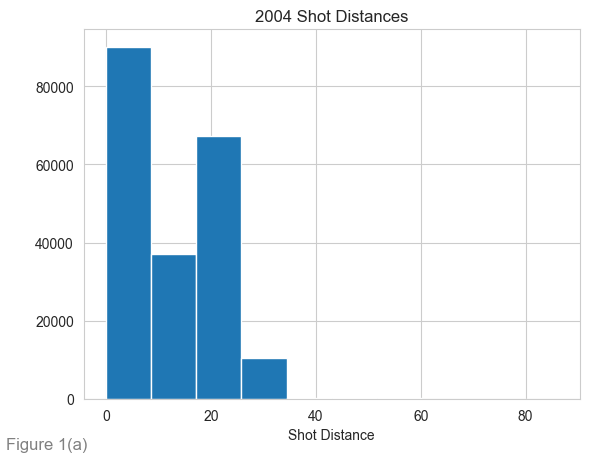

In [54]:
# 2004 shot attempt distance distribution
plt.hist(df['SHOT_DISTANCE'], bins=10)
plt.title('2004 Shot Distances')
plt.xlabel('Shot Distance')
plt.annotate(text='Figure 1(a)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

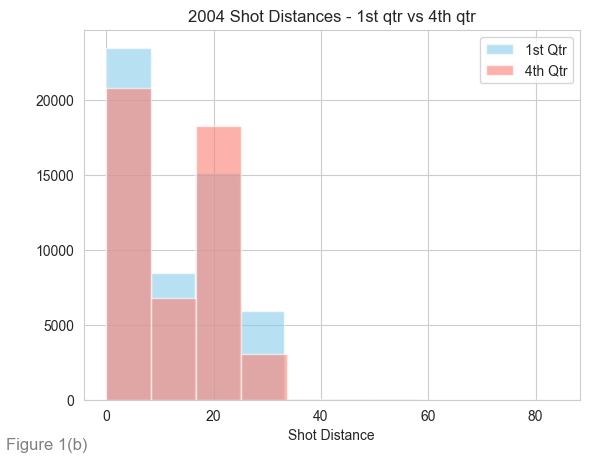

In [55]:
# 2004 shot attempt distance distribution comparison: 1st quarter vs 4th quarter
plt.hist([df.loc[df['QUARTER']== 1]['SHOT_DISTANCE']], bins=10,alpha=.6, label='1st Qtr', color='skyblue')
plt.hist(df.loc[df['QUARTER']== 4]['SHOT_DISTANCE'], bins=10,alpha=.6, label='4th Qtr', color='salmon')
plt.title('2004 Shot Distances - 1st qtr vs 4th qtr')
plt.legend(loc='upper right')
plt.xlabel('Shot Distance')
plt.annotate(text='Figure 1(b)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

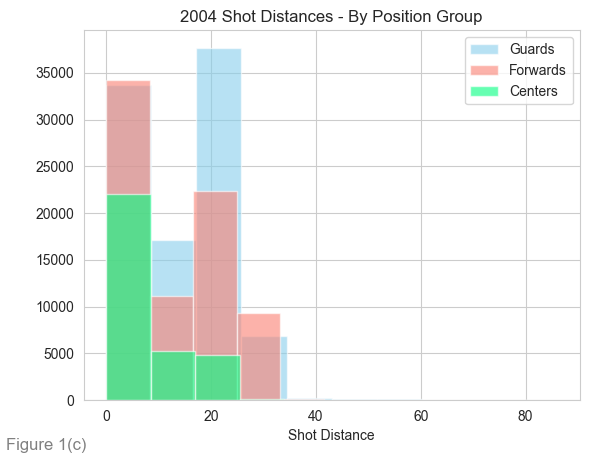

In [56]:
# 2004 shot attempt distance distribution comparison by position groups
plt.hist([df.loc[df['POSITION_GROUP']== 'G']['SHOT_DISTANCE']], bins=10,alpha=.6, label='Guards', color='skyblue')
plt.hist(df.loc[df['POSITION_GROUP']== 'F']['SHOT_DISTANCE'], bins=10,alpha=.6, label='Forwards', color='salmon')
plt.hist(df.loc[df['POSITION_GROUP']== 'C']['SHOT_DISTANCE'], bins=10,alpha=.6, label='Centers', color='springgreen')
plt.title('2004 Shot Distances - By Position Group')
plt.legend(loc='upper right')
plt.xlabel('Shot Distance')
plt.annotate(text='Figure 1(c)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

In [10]:
# Loading in 2024 season data for quick comparisons
df2 = pd.read_csv("NBA_2024_Shots.csv")

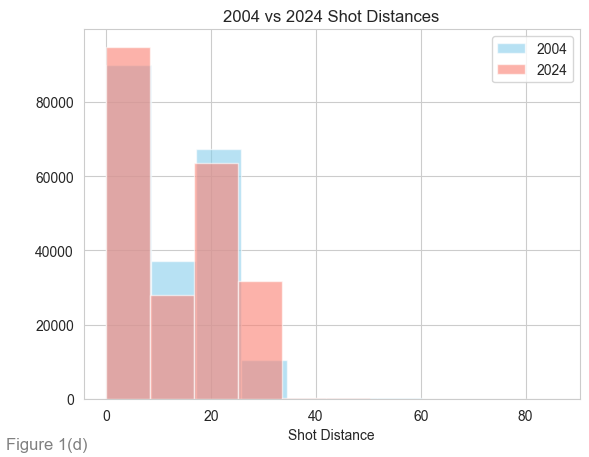

In [57]:
plt.hist(df['SHOT_DISTANCE'], bins=10, alpha=.6, label='2004', color='skyblue')
plt.hist(df2['SHOT_DISTANCE'], bins=10, alpha=.6, label='2024', color='salmon')
plt.title('2004 vs 2024 Shot Distances')
plt.legend(loc='upper right')
plt.xlabel('Shot Distance')
plt.annotate(text='Figure 1(d)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

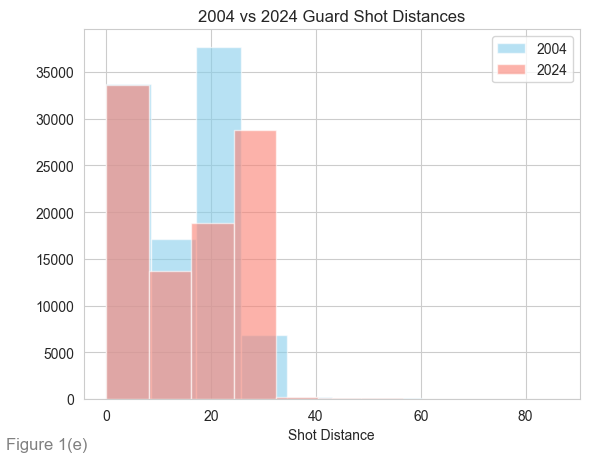

In [58]:

# df2 = pd.read_csv("NBA_2024_Shots.csv")
plt.hist([df.loc[df['POSITION_GROUP']== 'G']['SHOT_DISTANCE']], bins=10, alpha=.6, label='2004', color='skyblue')
plt.hist(df2.loc[df2['POSITION_GROUP']== 'G']['SHOT_DISTANCE'], bins=10, alpha=.6, label='2024', color='salmon')
plt.title('2004 vs 2024 Guard Shot Distances')
plt.legend(loc='upper right')
plt.xlabel('Shot Distance')
plt.annotate(text='Figure 1(e)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

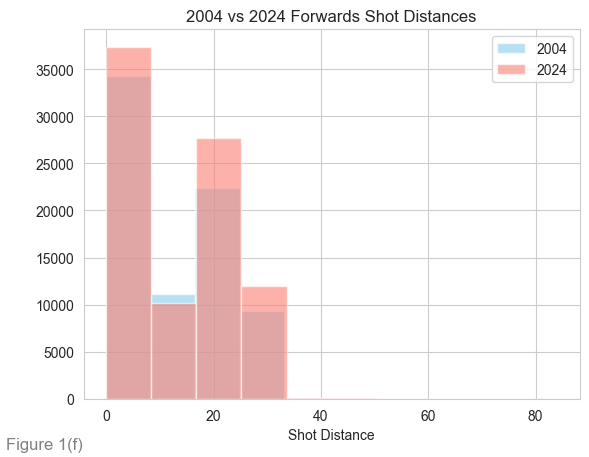

In [59]:
plt.hist([df.loc[df['POSITION_GROUP']== 'F']['SHOT_DISTANCE']], bins=10, alpha=.6, label='2004', color='skyblue')
plt.hist(df2.loc[df2['POSITION_GROUP']== 'F']['SHOT_DISTANCE'], bins=10, alpha=.6, label='2024', color='salmon')
plt.title('2004 vs 2024 Forwards Shot Distances')
plt.legend(loc='upper right')
plt.xlabel('Shot Distance')
plt.annotate(text='Figure 1(f)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

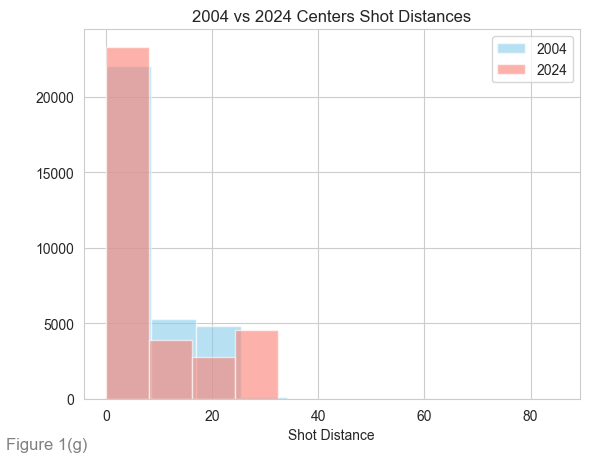

In [60]:
counts, bins, patches = plt.hist([df.loc[df['POSITION_GROUP']== 'C']['SHOT_DISTANCE']], bins=10, alpha=.6, label='2004', color='skyblue')
plt.hist(df2.loc[df2['POSITION_GROUP']== 'C']['SHOT_DISTANCE'], bins=10, alpha=.6, label='2024', color='salmon')
plt.title('2004 vs 2024 Centers Shot Distances')
plt.legend(loc='upper right')
plt.xlabel('Shot Distance')
plt.annotate(text='Figure 1(g)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

In [15]:
print(bins)

[ 0.   8.3 16.6 24.9 33.2 41.5 49.8 58.1 66.4 74.7 83. ]


In [16]:
center_attempts04 = len(df.loc[(df['POSITION_GROUP']== 'C') & (df['SHOT_DISTANCE'] > 25.5)])
center_attempts24 = len(df2.loc[(df2['POSITION_GROUP']== 'C') & (df2['SHOT_DISTANCE'] > 25.5)])

print(f'In 2004, there centers only attempted {center_attempts04} shots from 25.5 feet and beyond, in 2024 there were {center_attempts24} attempts. An increase of {((center_attempts24-center_attempts04)/center_attempts04) * 100:.2f}%')

In 2004, there centers only attempted 109 shots from 25.5 feet and beyond, in 2024 there were 2730 attempts. An increase of 2404.59%


In [17]:
df.groupby('POSITION_GROUP').agg(shots_from_deep=('SHOT_DISTANCE', lambda x: (x > 25.5).sum()), distribution = ('SHOT_DISTANCE', lambda x: ((x > 25.5).sum())/len(df.loc[df['SHOT_DISTANCE'] > 25.5])))

,shots_from_deep,distribution
POSITION_GROUP,,
C,109,0.018085
F,1904,0.315912
G,4014,0.666003


In [18]:
df2.groupby('POSITION_GROUP').agg(shots_from_deep=('SHOT_DISTANCE', lambda x: (x > 25.5).sum()), distribution = ('SHOT_DISTANCE', lambda x: ((x > 25.5).sum())/len(df2.loc[df2['SHOT_DISTANCE'] > 25.5])))

,shots_from_deep,distribution
POSITION_GROUP,,
C,2730,0.083694
F,12280,0.376468
G,17348,0.531837


In [19]:
import glob
files = glob.glob("*.csv")
nba_shots = pd.DataFrame()

for i in files:
    df = pd.read_csv(i)
    nba_shots = pd.concat([nba_shots,df], axis=0)

In [21]:
nba_shots

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2009,2008-09,1610612744,Golden State Warriors,201627,Anthony Morrow,G,SG,04-15-2009,20801229,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,1
1,2009,2008-09,1610612744,Golden State Warriors,101235,Kelenna Azubuike,F,SF,04-15-2009,20801229,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,9
2,2009,2008-09,1610612756,Phoenix Suns,255,Grant Hill,F,SF,04-15-2009,20801229,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,25
3,2009,2008-09,1610612739,Cleveland Cavaliers,200789,Daniel Gibson,G,PG,04-15-2009,20801219,...,Restricted Area,Center,C,Less Than 8 ft.,-0.2,5.25,0,5,0,4
4,2009,2008-09,1610612756,Phoenix Suns,255,Grant Hill,F,SF,04-15-2009,20801229,...,Mid-Range,Left Side,L,8-16 ft.,8.7,7.55,8,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205545,2015,2014-15,1610612745,Houston Rockets,2730,Dwight Howard,C,C,10-28-2014,21400003,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,1.0,10.45,5,1,11,23
205546,2015,2014-15,1610612742,Dallas Mavericks,2199,Tyson Chandler,C,C,10-28-2014,21400002,...,Restricted Area,Center,C,Less Than 8 ft.,1.0,5.85,1,1,11,32
205547,2015,2014-15,1610612759,San Antonio Spurs,2225,Tony Parker,G,PG,10-28-2014,21400002,...,Mid-Range,Left Side Center,LC,16-24 ft.,11.4,19.75,18,1,11,48
205548,2015,2014-15,1610612740,New Orleans Pelicans,203076,Anthony Davis,F,PF,10-28-2014,21400001,...,Mid-Range,Center,C,16-24 ft.,-5.0,24.65,20,1,11,43


In [22]:
nba_shots.groupby(['SEASON_1','POSITION_GROUP']).agg(
    shots_from_deep = ('SHOT_DISTANCE', lambda x: (x>25.5).sum()),  
)

shots_from_deep
SEASON_1 POSITION_GROUP                 
2004     C                           109
         F                          1904
         G                          4014
2005     C                           171
         F                          2157
...                                  ...
2023     F                         10414
         G                         18476
2024     C                          2730
         F                         12280
         G                         17348

[63 rows x 1 columns]

In [23]:
nba_shots['SEASON_1'] = nba_shots['SEASON_1'].astype(int)

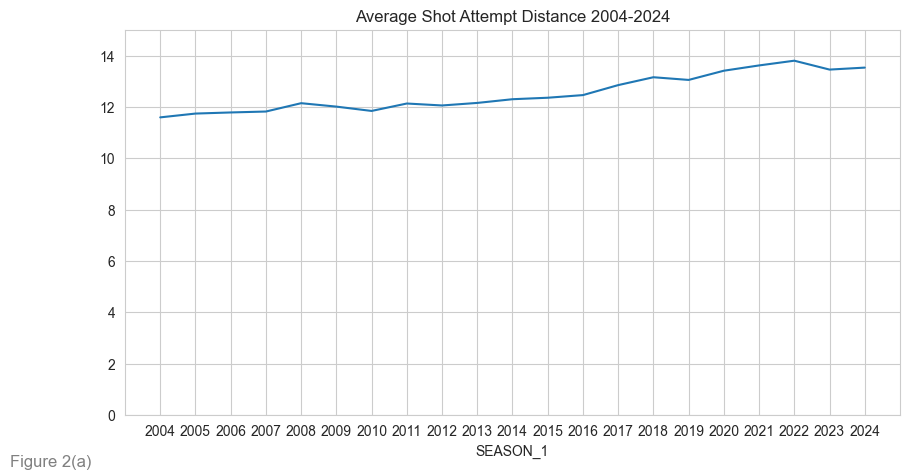

In [53]:
# Plotting line chart showing average shot attempt distances each year year
nba_shots.groupby('SEASON_1')['SHOT_DISTANCE'].mean().plot(kind='line', figsize=(10,5))
integer_ticks = np.arange(int(nba_shots['SEASON_1'].min()), int(nba_shots['SEASON_1'].max()) + 1, 1)
plt.xticks(integer_ticks) # Custom tick range to prevent half point increments on x-axis
plt.ylim((0,15))
plt.title('Average Shot Attempt Distance 2004-2024')
plt.annotate(text='Figure 2(a)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

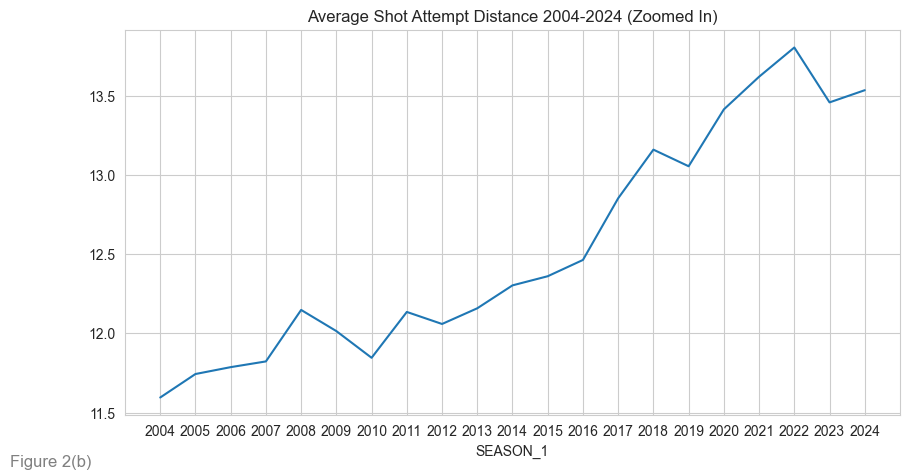

In [52]:
# Plotting line chart showing average shot attempt distances each year year
nba_shots.groupby('SEASON_1')['SHOT_DISTANCE'].mean().plot(kind='line', figsize=(10,5))
integer_ticks = np.arange(int(nba_shots['SEASON_1'].min()), int(nba_shots['SEASON_1'].max()) + 1, 1)
plt.xticks(integer_ticks) # Custom tick range to prevent half point increments on x-axis
plt.title('Average Shot Attempt Distance 2004-2024 (Zoomed In)')
plt.annotate(text='Figure 2(b)', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')
plt.show()

Text(0.01, 0.01, 'Figure 3')

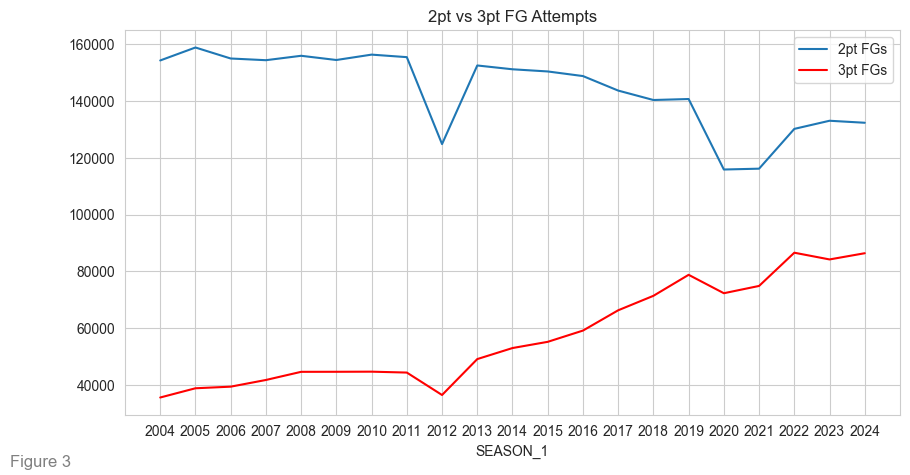

In [48]:
# plotting shot attempts by shot type 
plt.figure(figsize=(10,5))
nba_shots.loc[nba_shots['SHOT_TYPE'] == '2PT Field Goal'].groupby(['SEASON_1'])['SHOT_TYPE'].count().plot(kind='line', label='2pt FGs')
nba_shots.loc[nba_shots['SHOT_TYPE'] == '3PT Field Goal'].groupby(['SEASON_1'])['SHOT_TYPE'].count().plot(kind='line', color='red', label='3pt FGs')
integer_ticks = np.arange(int(nba_shots['SEASON_1'].min()), int(nba_shots['SEASON_1'].max()) + 1, 1)
plt.xticks(integer_ticks)
plt.title('2pt vs 3pt FG Attempts')
plt.legend(loc='upper right')
plt.annotate(text='Figure 3', xy=(0.01, 0.01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=12, color='gray')

In [26]:
nba_shots.loc[nba_shots['SHOT_TYPE'] == '2PT Field Goal'].groupby(['SEASON_1'])['SHOT_TYPE'].count()

SEASON_1
2004    154310
2005    158878
2006    155001
2007    154401
2008    155957
2009    154471
2010    156367
2011    155477
2012    124830
2013    152542
2014    151198
2015    150433
2016    148808
2017    143692
2018    140368
2019    140716
2020    115864
2021    116161
2022    130187
2023    133056
2024    132346
Name: SHOT_TYPE, dtype: int64

In [35]:
nba_shots.loc[nba_shots['SHOT_TYPE'] == '3PT Field Goal'].groupby(['SEASON_1'])['SHOT_TYPE'].count()

SEASON_1
2004    35493
2005    38748
2006    39313
2007    41671
2008    44544
2009    44559
2010    44599
2011    44284
2012    36375
2013    49037
2014    52928
2015    55117
2016    59085
2017    66237
2018    71339
2019    78742
2020    72252
2021    74822
2022    86535
2023    84164
2024    86355
Name: SHOT_TYPE, dtype: int64

In [27]:
nba_shots.loc[nba_shots['SEASON_1'] == 2024]['SHOT_TYPE'].value_counts()

SHOT_TYPE
2PT Field Goal    132346
3PT Field Goal     86355
Name: count, dtype: int64

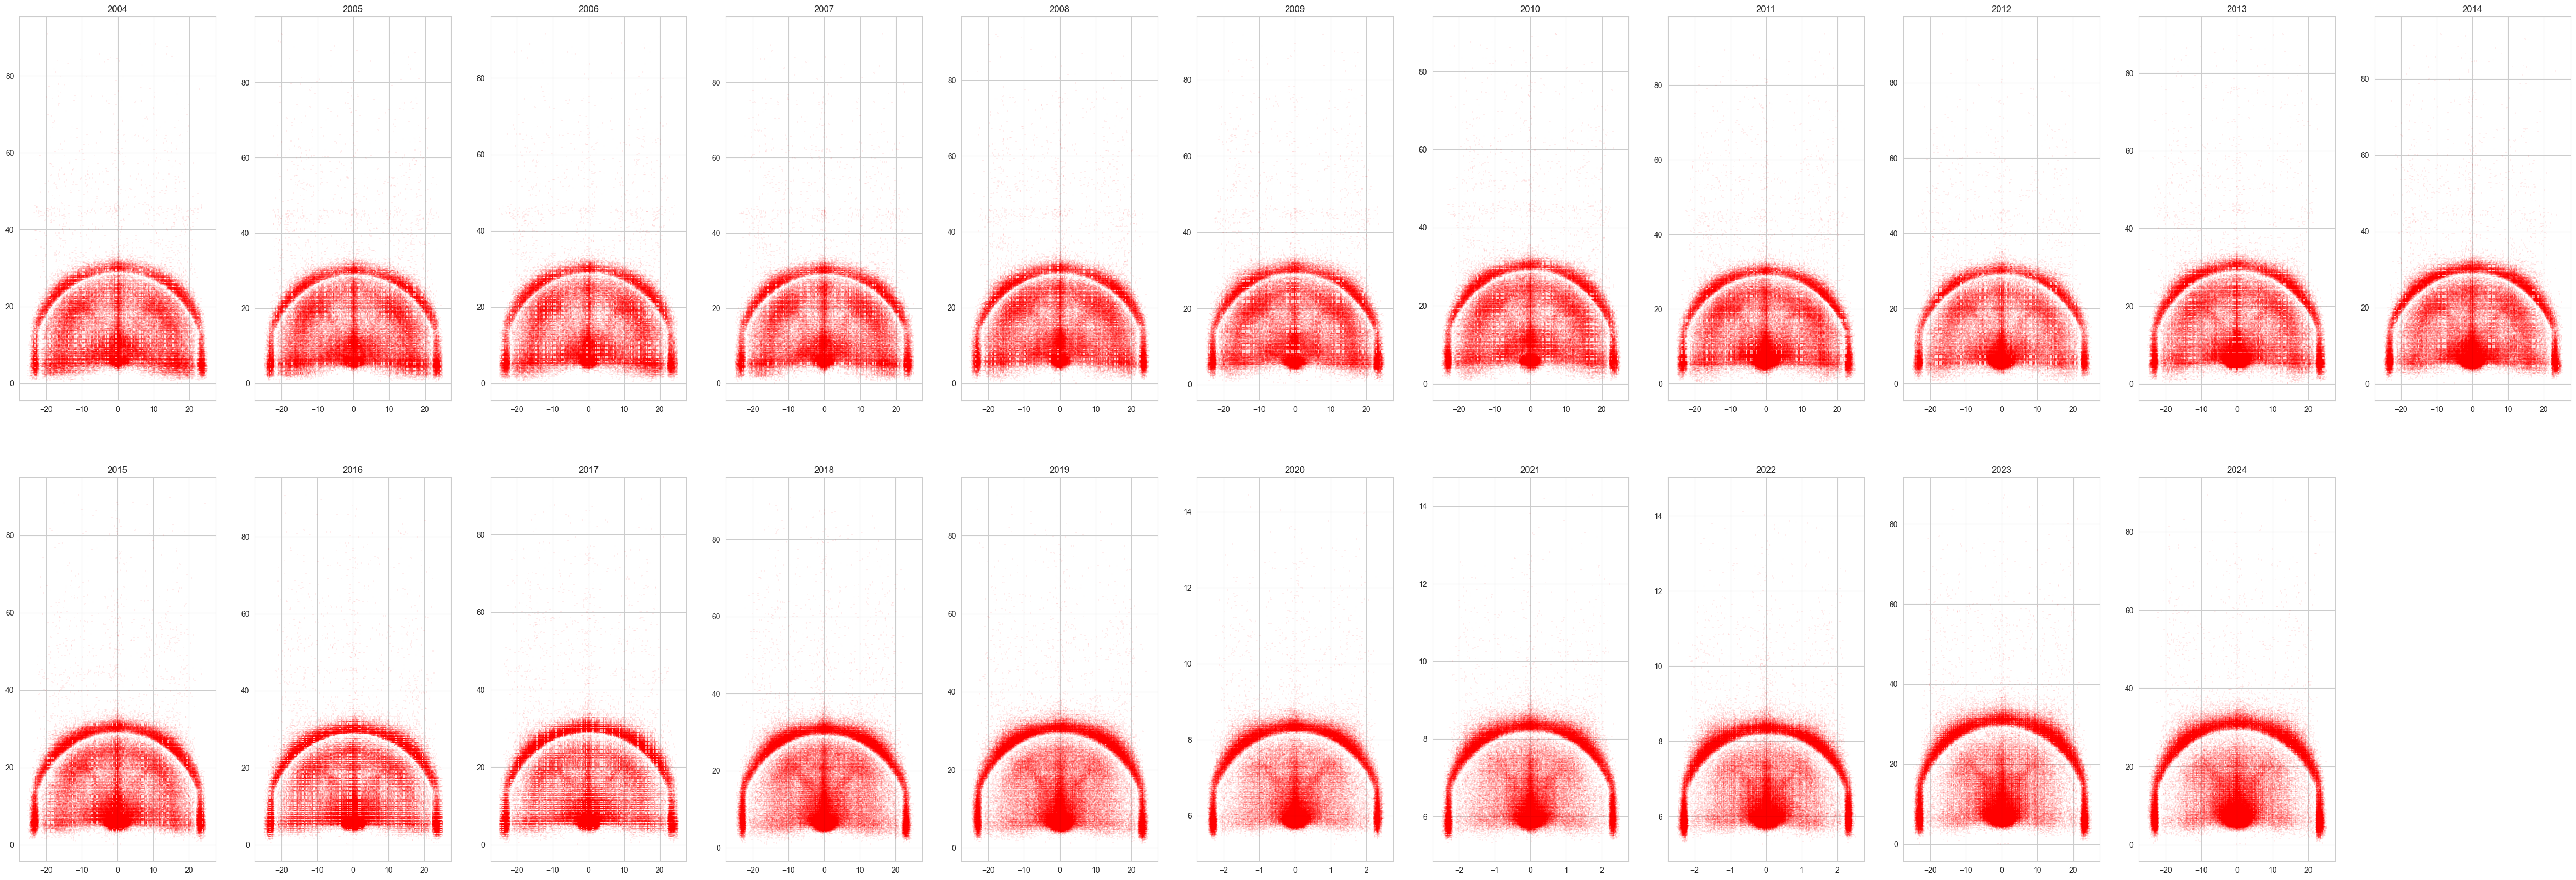

In [28]:
# Heatmap timeline showing shot attempt density by location on the court
years = nba_shots['SEASON_1'].unique()
years.sort()
plt.figure(figsize=(60,20)) # tailored sizing to ensure visibility
for i in range(len(years)):
    plt.subplot(2,11,i+1); plt.title(years[i]); plt.scatter(nba_shots.loc[nba_shots['SEASON_1'] == years[i], 'LOC_X'],nba_shots.loc[nba_shots['SEASON_1'] == years[i], 'LOC_Y'], alpha=.3,s=.03, color='red'); 

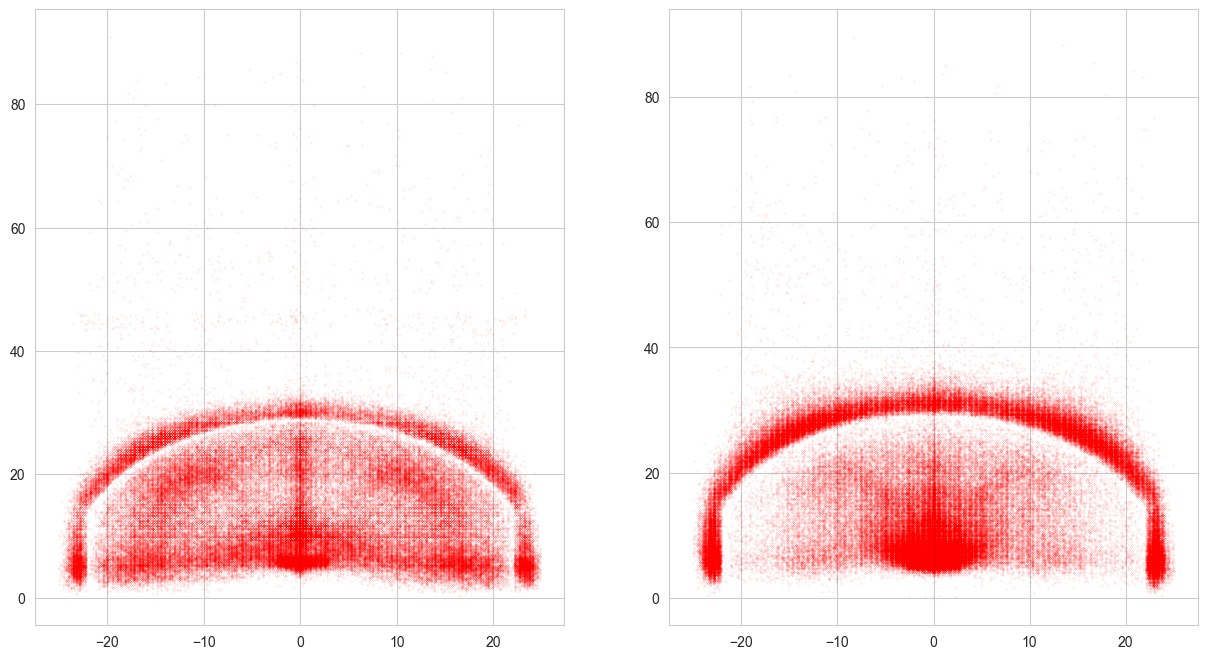

In [31]:
# Closer look comparing 2004 and 2024
plt.figure(figsize=(15,8))
plt.subplot(1,2,1);plt.scatter(nba_shots.loc[nba_shots['SEASON_1'] == 2004, 'LOC_X'],nba_shots.loc[nba_shots['SEASON_1'] == 2004, 'LOC_Y'], alpha=.3, color='red', s=.03)
plt.subplot(1,2,2);plt.scatter(nba_shots.loc[nba_shots['SEASON_1'] == 2024, 'LOC_X'],nba_shots.loc[nba_shots['SEASON_1'] == 2024, 'LOC_Y'], alpha=.3, color='red', s=.03)

In [33]:
# save full dataset to csv for further use in tableau
nba_shots.to_csv('shots.csv')

In [32]:
nba_shots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4231262 entries, 0 to 205549
Data columns (total 26 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SEASON_1        int64  
 1   SEASON_2        object 
 2   TEAM_ID         int64  
 3   TEAM_NAME       object 
 4   PLAYER_ID       int64  
 5   PLAYER_NAME     object 
 6   POSITION_GROUP  object 
 7   POSITION        object 
 8   GAME_DATE       object 
 9   GAME_ID         int64  
 10  HOME_TEAM       object 
 11  AWAY_TEAM       object 
 12  EVENT_TYPE      object 
 13  SHOT_MADE       bool   
 14  ACTION_TYPE     object 
 15  SHOT_TYPE       object 
 16  BASIC_ZONE      object 
 17  ZONE_NAME       object 
 18  ZONE_ABB        object 
 19  ZONE_RANGE      object 
 20  LOC_X           float64
 21  LOC_Y           float64
 22  SHOT_DISTANCE   int64  
 23  QUARTER         int64  
 24  MINS_LEFT       int64  
 25  SECS_LEFT       int64  
dtypes: bool(1), float64(2), int64(8), object(15)
memory usage: 843.4+ MB
